# Data Exploring

In [1]:
data = read.csv('Du lieu cung cap/mushroom.csv',sep = ',', header=TRUE, row.names=1)

In [2]:
head(data)

,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,...,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Poisonous,x,s,n,t,None,f,c,n,k,...,s,w,w,p,w,o,p,Buff,s,u
2,Edible,x,s,y,t,Almonds,f,c,b,k,...,s,w,w,p,w,o,p,Chocolate,n,g
3,Edible,b,s,w,t,Fishy,f,c,b,n,...,s,w,w,p,w,o,p,Chocolate,n,m
4,Poisonous,x,y,w,t,None,f,c,n,n,...,s,w,w,p,w,o,p,Buff,s,u
5,Edible,x,s,g,f,Musty,f,w,b,k,...,s,w,w,p,w,o,e,Chocolate,a,g
6,Edible,x,y,y,t,Almonds,f,c,b,n,...,s,w,w,p,w,o,p,Buff,n,g


In [3]:
print(paste('Number of rows:', nrow(data)))
print(paste('Number of cols:', ncol(data)))

[1] "Number of rows: 8124"
[1] "Number of cols: 23"


In [4]:
summary(data)

    Class            cap.shape         cap.surface         cap.color        
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
   bruises              odor           gill.attachment    gill.spacing      
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
  gill.size          gill.color        stalk.shape         stalk.root       
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 stalk.surface.above.ring stalk.surface.below.ring stalk.color.above.ring
 L

In [5]:
str(data)

'data.frame':	8124 obs. of  23 variables:
 $ Class                   : chr  "Poisonous" "Edible" "Edible" "Poisonous" ...
 $ cap.shape               : chr  "x" "x" "b" "x" ...
 $ cap.surface             : chr  "s" "s" "s" "y" ...
 $ cap.color               : chr  "n" "y" "w" "w" ...
 $ bruises                 : chr  "t" "t" "t" "t" ...
 $ odor                    : chr  "None" "Almonds" "Fishy" "None" ...
 $ gill.attachment         : chr  "f" "f" "f" "f" ...
 $ gill.spacing            : chr  "c" "c" "c" "c" ...
 $ gill.size               : chr  "n" "b" "b" "n" ...
 $ gill.color              : chr  "k" "k" "n" "n" ...
 $ stalk.shape             : chr  "e" "e" "e" "e" ...
 $ stalk.root              : chr  "e" "c" "c" "e" ...
 $ stalk.surface.above.ring: chr  "s" "s" "s" "s" ...
 $ stalk.surface.below.ring: chr  "s" "s" "s" "s" ...
 $ stalk.color.above.ring  : chr  "w" "w" "w" "w" ...
 $ stalk.color.below.ring  : chr  "w" "w" "w" "w" ...
 $ veil.type               : chr  "p" "p" "p" "p" ..

In [6]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [7]:
# Let’s counting and displaying the categories for each variable:
number_class <- function(x){
  x <- length(levels(x))
}

dframe <- data %>% map_dbl(function(.x) number_class(.x)) %>% tibble::enframe() %>% 
       rownames_to_column() %>% arrange(desc(value))
colnames(dframe) <- c("index variable", "variable name", "number of levels")

dframe

index variable,variable name,number of levels
<chr>,<chr>,<dbl>
1,Class,0
2,cap.shape,0
3,cap.surface,0
4,cap.color,0
5,bruises,0
6,odor,0
7,gill.attachment,0
8,gill.spacing,0
9,gill.size,0


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



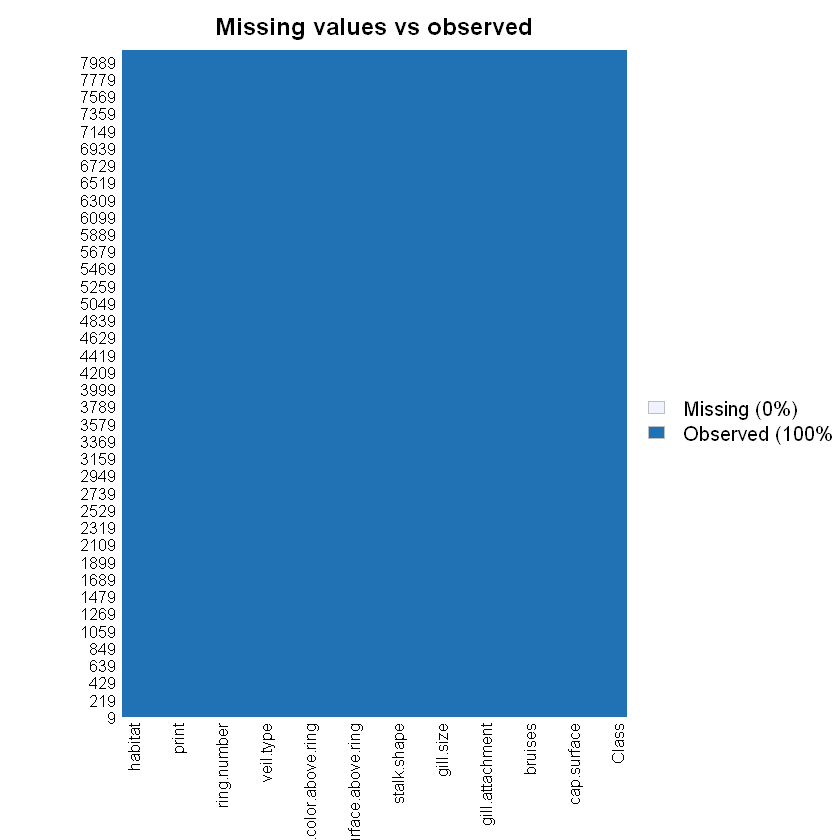

In [8]:
# check missing value
library(Amelia)
missmap(data, main='Missing values vs observed')

- Outliers not found

In [9]:
# Check class bias
print(table(data$Class))


   Edible Poisonous 
     4208      3916 


# Data Analysis
- Now, I have plotted the histograms of each category and split them into two graphs according to their edibility. The objective of doing do is to find the attributes which are exclusive only in either class. The more exclusiveness hints towards a stronger correlation between the attribute and the edibility of the mushroom. The first three attributes - cap shape, cap surface and cap color are plotted below.

In [10]:
library(ggplot2)
library(gridExtra)

m1 <- ggplot(aes(x = cap.shape), data = data) +
  geom_histogram(stat = "count") +
  facet_wrap(~Class) +
  xlab("Cap Shape")


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


In [11]:
m2 <- ggplot(aes(x = cap.surface), data = data) +
  geom_histogram(stat = "count") +
  facet_wrap(~Class) +
  xlab("Cap Surface")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


In [12]:
m3 <- ggplot(aes(x = cap.color), data = data) +
  geom_histogram(stat = "count") +
  facet_wrap(~Class) +
  xlab("Cap Color")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


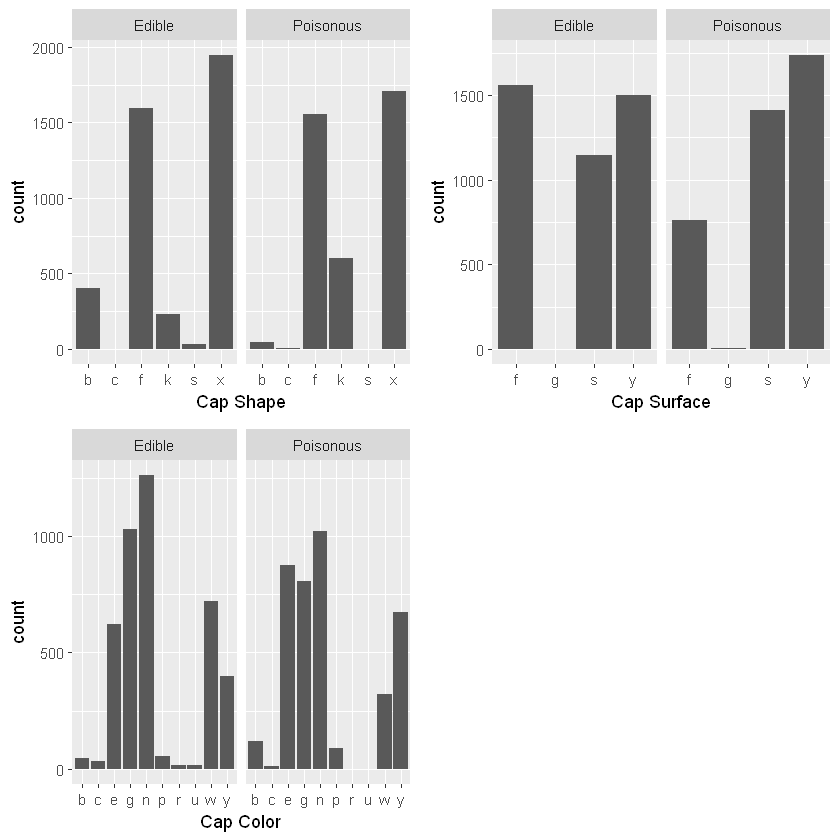

In [13]:
grid.arrange(m1, m2, m3, ncol = 2)